Feature Scaling doesn't remove outlier but magnitude of outlier changes
Feature Scaling is used when there is a data which has large range say in 1000s and there is a data which has small range say in decimal then while training model machine generally not take decimal data which is or may of importance so feature scaling here reduce the gap between these data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("C:\\vs-code-folder\\ML_Practice\\Bengaluru_House_Data.csv")
dataset.head(8)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00


In [5]:
dataset.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
dataset.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

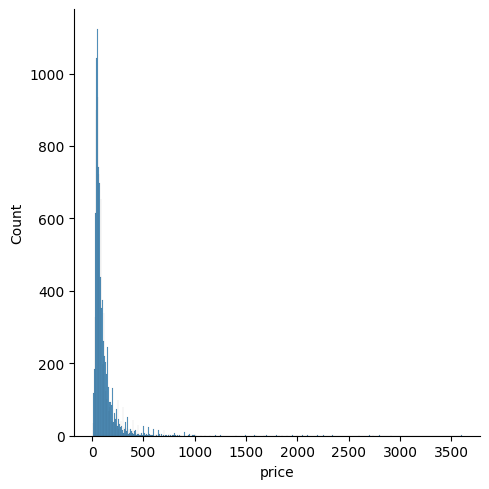

In [7]:
sns.displot(dataset["price"])
plt.show()

In price column min value is 8 and max value is 3600
so we will perform scaling on price column

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
#ss = standard scaler
ss = StandardScaler()
ss.fit(dataset[["price"]])#double bracket is necessary

StandardScaler()

In [11]:
ss.transform(dataset[["price"]])

array([[-0.49337155],
       [ 0.04990648],
       [-0.33944389],
       ...,
       [-0.35286977],
       [ 2.5202675 ],
       [-0.64152608]])

In [12]:
dataset["ss_price"]  = pd.DataFrame(ss.transform(dataset[["price"]]),columns=["x"])#transfer data

In [13]:
dataset.head(8)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,ss_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.493372
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.049906
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.339444
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.117917
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.413286
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,-0.500554
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00,0.613793
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00,3.272116


In [16]:
dataset.describe()

,bath,balcony,price,ss_price
count,13247.000000,12711.000000,13320.000000,1.332000e+04
mean,2.692610,1.584376,112.565627,2.773891e-17
std,1.341458,0.817263,148.971674,1.000038e+00
min,1.000000,0.000000,8.000000,-7.019425e-01
25%,2.000000,1.000000,50.000000,-4.199991e-01
50%,2.000000,2.000000,72.000000,-2.723145e-01
75%,3.000000,2.000000,120.000000,4.990648e-02
max,40.000000,3.000000,3600.000000,2.341093e+01


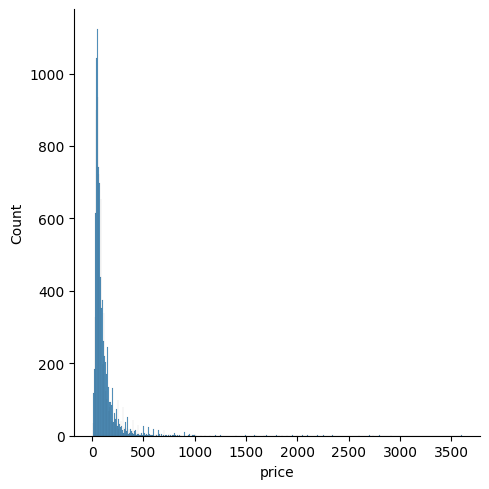

In [15]:
sns.displot(dataset["price"])
plt.show()

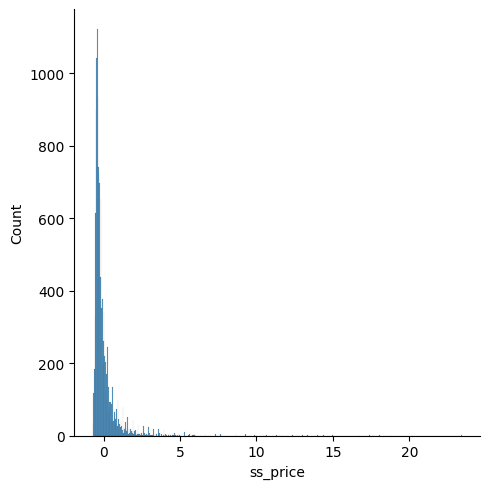

In [14]:
sns.displot(dataset["ss_price"])
plt.show()

Now we will view both graph as comparison side by side

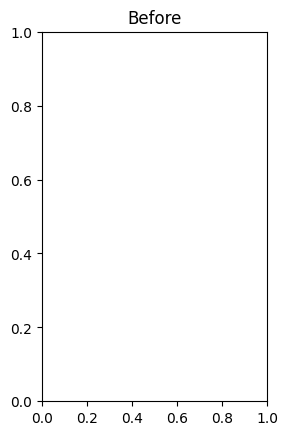

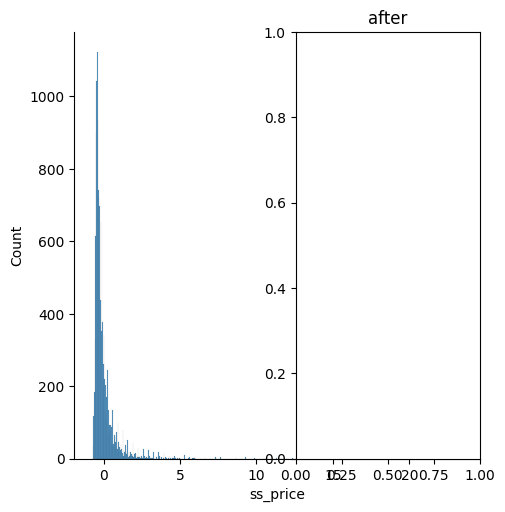

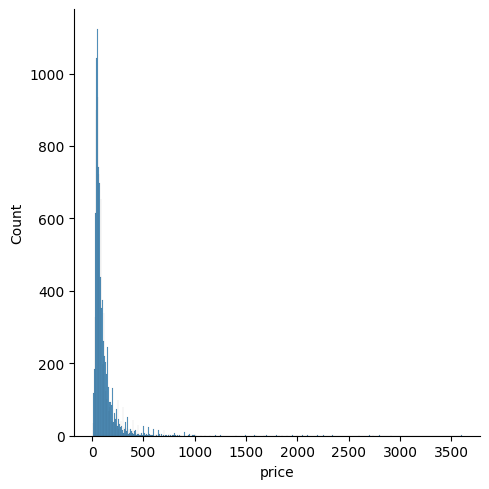

In [19]:
plt.subplot(1,2,1)
plt.title("Before")
sns.displot(dataset["ss_price"])

plt.subplot(1,2,2)
plt.title("after")
sns.displot(dataset["price"])

plt.show()
